# <span style="color: blue;"><center> <u> ZILLOW REGRESSION PROJECT: FINAL REPORT</u></center> 

    

 <span style="color: blue; text-align: right;">By: Miatta Sinayoko</span>



<style>
  h1 {
    border: 2px solid blue;
  }
</style>



# <span style="color: blue;"><left><u>GOAL:</u></left> 
    
   <span style="color:blue;">* Identify key drivers that impact property value for single family properties</span>
    
<span style="color:blue;">* Develop a model that can accurately predict property value
</span>
       
    


# <span style="color: blue;"><left><u>IMPORTS</u></left> 


In [1]:
#Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import host, user, password

from scipy import stats
from pydataset import data
from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

import explore as e
import wrangle as w
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor


# <span style="color: blue;"><left><u>ACQUIRE</u></left> 
    
<span style="color:blue;">* Data acquired from Codeup database</span>
    
<span style="color:blue;">* Data set has 5 columns and 52,441 rows before cleaning.</span>   
    
<span style="color:blue;">* Each row is a single property.</span>  
    
<span style="color:blue;">* Each column contains information about the properties.</span>
    
    
    

In [2]:
df = w.get_zillow_data()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips
0,4.0,3.5,3100.0,1023282.0,6059.0
1,2.0,1.0,1465.0,464000.0,6111.0
2,3.0,2.0,1243.0,564778.0,6059.0
3,4.0,3.0,2376.0,145143.0,6037.0
4,4.0,3.0,2962.0,773303.0,6037.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52441 non-null  float64
 1   bathroomcnt                   52441 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   taxvaluedollarcnt             52440 non-null  float64
 4   fips                          52441 non-null  float64
dtypes: float64(5)
memory usage: 2.0 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,52441.0,3.300681,0.949094,0.0,3.0,3.0,4.00,14.0
bathroomcnt,52441.0,2.299403,1.022772,0.0,2.0,2.0,3.00,18.0
calculatedfinishedsquarefeet,52359.0,1922.890754,1004.365838,128.0,1268.0,1659.0,2306.00,21929.0
taxvaluedollarcnt,52440.0,529688.163921,751894.553363,1000.0,193747.5,373612.0,619301.25,49061236.0
fips,52441.0,6049.132149,21.029067,6037.0,6037.0,6037.0,6059.00,6111.0


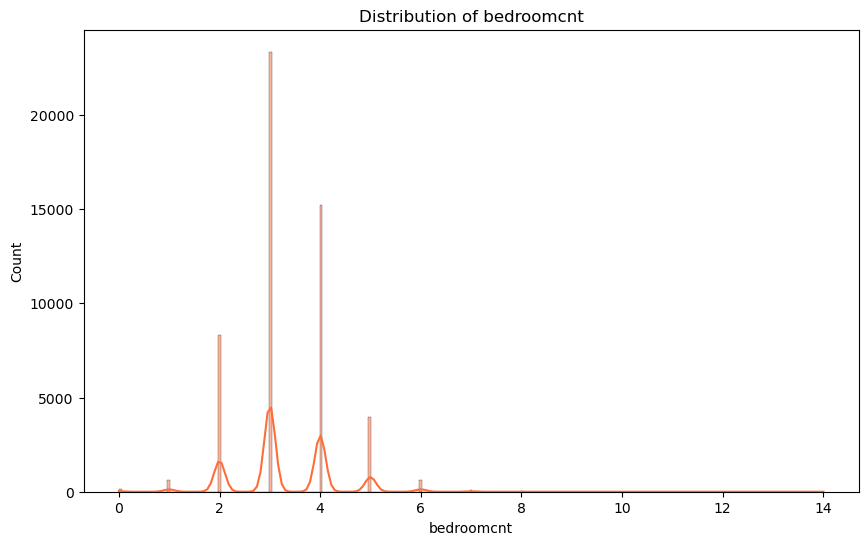

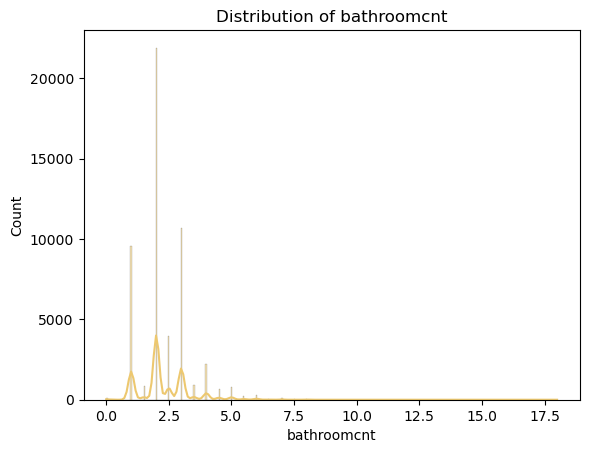

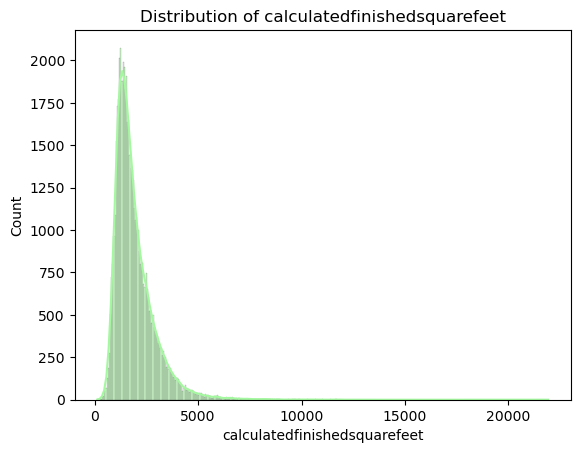

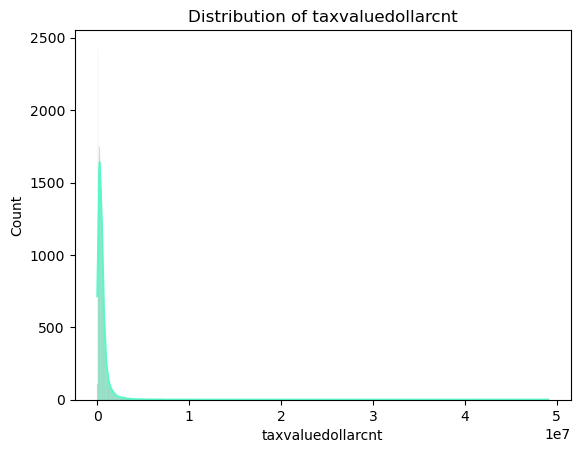

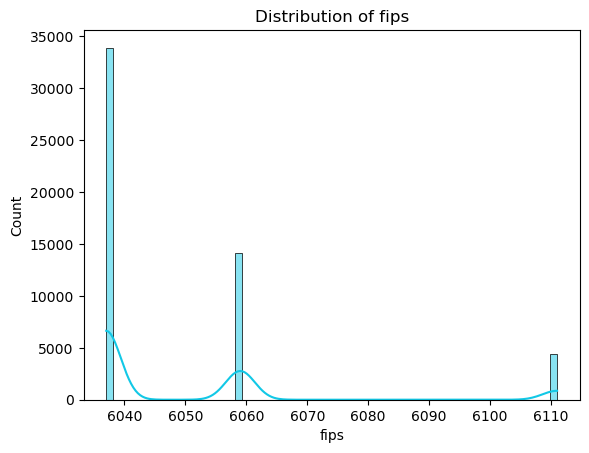

In [6]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a rainbow palette with 6 colors
colors = sns.color_palette('rainbow', 6)

# Loop through the columns in the DataFrame
for column in df.columns:

    # Create a histplot with kde=True
    sns.histplot(data=df[column], kde=True, color=colors.pop())

    # Add a title
    plt.title(f'Distribution of {column}')

    # Show the plot
    plt.show()


In [ ]:
# Calculate percent of data loss from dropping nulls
(83 / 52441) * 100

0.1582731069201579

In [ ]:
# See the unique values for the fips column
df.fips.unique()

array([6059., 6111., 6037.])

In [ ]:
# See how many nulls are in each column
df.isnull().sum()

bedroomcnt                       0
bathroomcnt                      0
calculatedfinishedsquarefeet    82
taxvaluedollarcnt                1
fips                             0
dtype: int64

# <span style="color: blue;"><left><u>PREPARE</u></left> 

    
    

<span style="color:blue">* Column Renaming</span>
    
<span style="color:blue">* Data Type Adjustment</span>
    
<span style="color:blue">* FIPS Renaming</span>
    
<span style="color:blue">* Handling Null Values </span>
    
<span style="color:blue">* Outlier Removal</span>
    
<span style="color:blue">* Data Split</span>
    

# <span style="color: blue;"><center><u>DATA DICTIONARY</u></center> 


| Feature | Description | 
|---|---|
| Bedroom | Number of bedrooms in the property |
| Bathroom | Number of bathrooms in the property |
| Square Footage | Total calculated square footage of the property |
| **Home Value** | Assessed property value |
| **County** | County of property location in California.|



In [10]:
# Clean and prepare the data
df = w.prep_zillow_data(df) 

In [11]:
df.head(5)

,bedroom,bathroom,sqft,home_value,county
0,4.0,3.5,3100,1023282.0,Orange
1,2.0,1.0,1465,464000.0,Ventura
2,3.0,2.0,1243,564778.0,Orange
3,4.0,3.0,2376,145143.0,Los Angeles
4,4.0,3.0,2962,773303.0,Los Angeles


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46765 entries, 0 to 52440
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedroom     46765 non-null  float64
 1   bathroom    46765 non-null  float64
 2   sqft        46765 non-null  int64  
 3   home_value  46765 non-null  float64
 4   county      46765 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ MB


In [13]:
drop_nulls = df.isnull().sum()
drop_nulls


bedroom       0
bathroom      0
sqft          0
home_value    0
county        0
dtype: int64

In [14]:
df.shape


(46765, 5)

In [15]:
#Check for are any nulls in fips
df.isnull().any()

bedroom       False
bathroom      False
sqft          False
home_value    False
county        False
dtype: bool

In [16]:
df.columns[df.isnull().any()]


Index([], dtype='object')

In [17]:
df.head()


,bedroom,bathroom,sqft,home_value,county
0,4.0,3.5,3100,1023282.0,Orange
1,2.0,1.0,1465,464000.0,Ventura
2,3.0,2.0,1243,564778.0,Orange
3,4.0,3.0,2376,145143.0,Los Angeles
4,4.0,3.0,2962,773303.0,Los Angeles


In [18]:
# Split the data into train, validate, and test sets
train, validate, test = w.split_data(df)


In [19]:
# save the string columns for later
train_county = train.county
validate_county = validate.county
test_county = test.county

# <span style="color: blue;"><left><u>EXPLORE</u></left> 



<span style="color:blue;">Exploration: We will provide answers on the relationships between different variables and home value.</span>

<span style="color:blue;">* County and Home Value Relationship</span>

<span style="color:blue;">* Bedrooms and Home Value Relationship</span>

<span style="color:blue;">* Bathrooms and Home Value Relationship</span>

<span style="color:blue;">* Bedroom and Bathroom Relationship</span>

<span style="color:blue;">* Square Footage and Home Value Relationship</span>



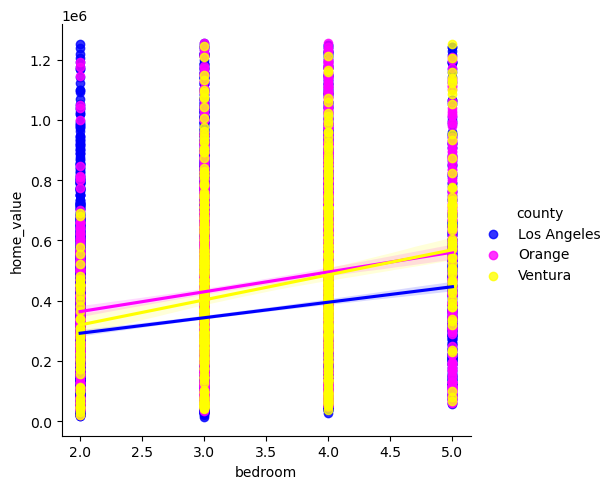

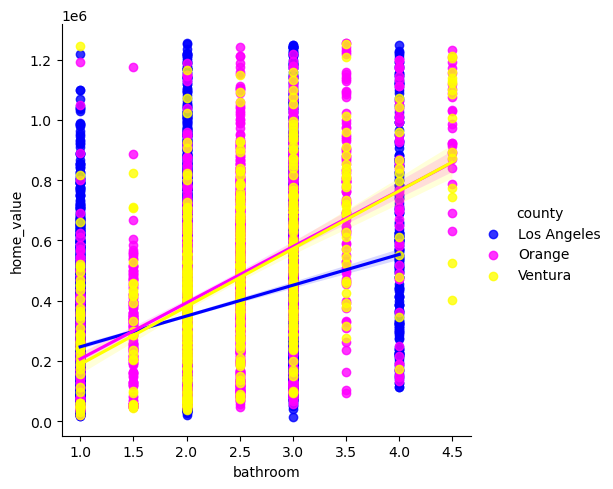

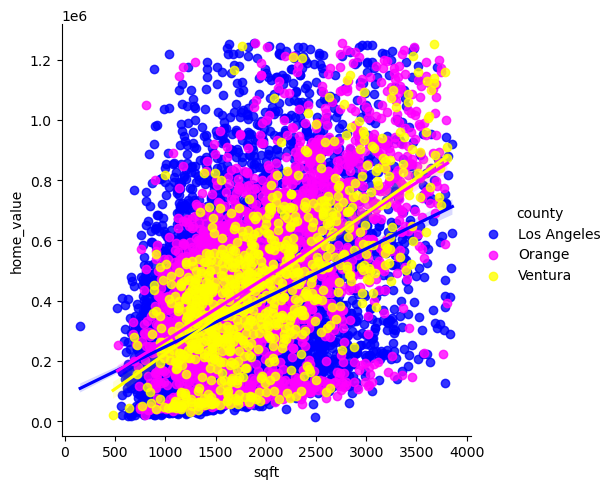

In [ ]:
#Visualizing continuous data
e.plot_variable_pairs(train)

 **County and Home Value Relationship**: Does the county the property is located relate to the home value? 


<Figure size 1200x600 with 0 Axes>

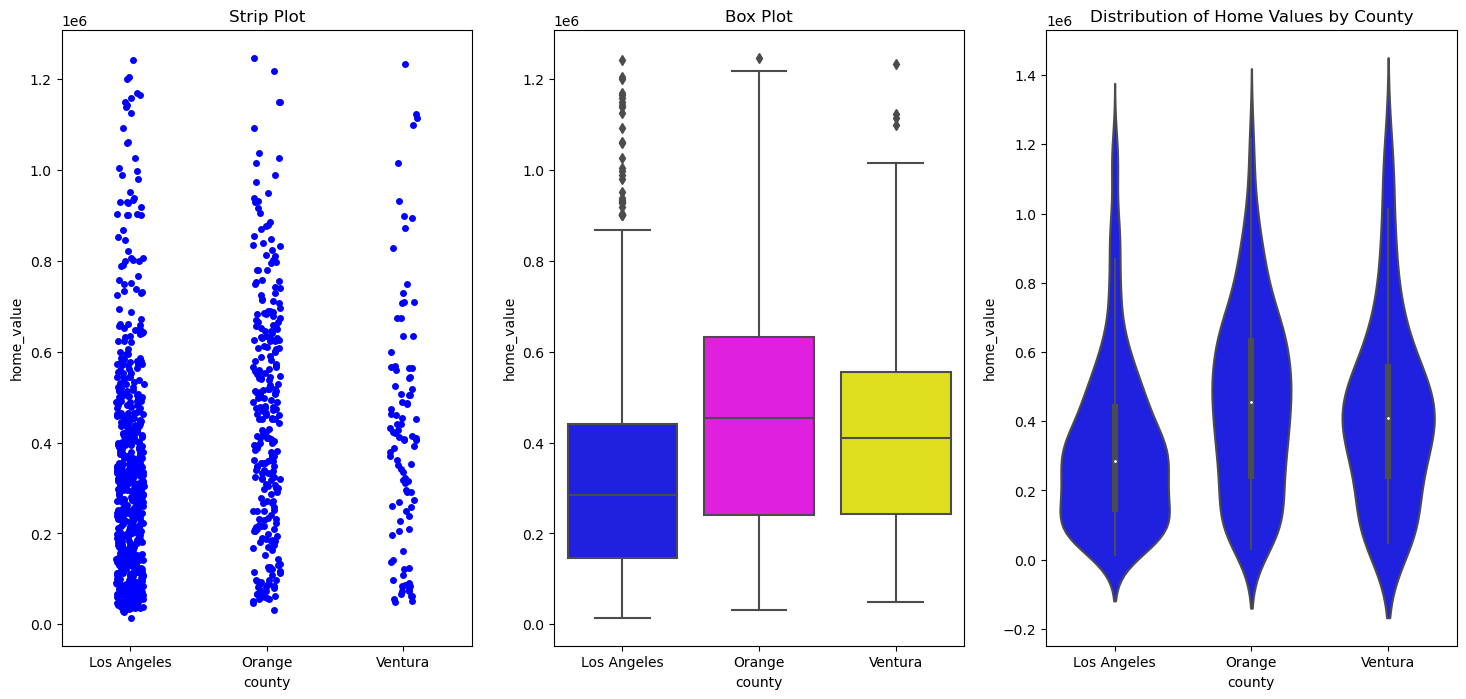

In [ ]:
# View  categorical feature
e.plot_categorical_and_continuous_vars(train,'county','home_value')


<span style="color:blue;">**Bedrooms and Home Value Relationship:** Does number of bedrooms relate to home value?</span>

<span style="color:blue;">
$H_{0}$: There is no statistically significant relationship between the number of bedrooms and home value</span>

<span style="color:blue;">$H_{a}$: There is a statistically significant relationship between the number of bedrooms and home value</span>

In [ ]:
r, p = pearsonr(train.bedroom, train.home_value)

print('r:', r)
print('p:', p)


r: 0.21541329395558473
p: 7.3318024315910485e-292


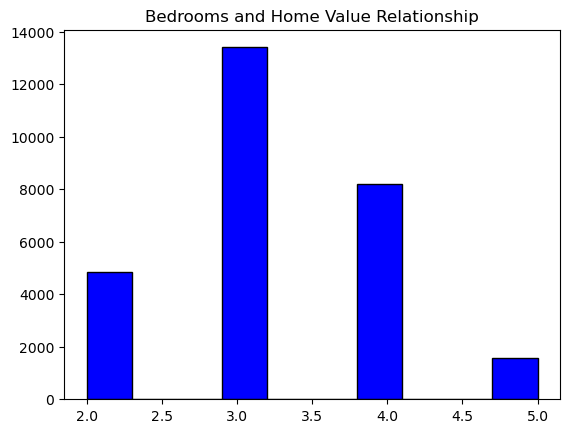

In [ ]:
# Bedroom histogram
plt.hist(train.bedroom, color = 'blue', ec='black')
plt.title('Bedrooms and Home Value Relationship')
plt.show()

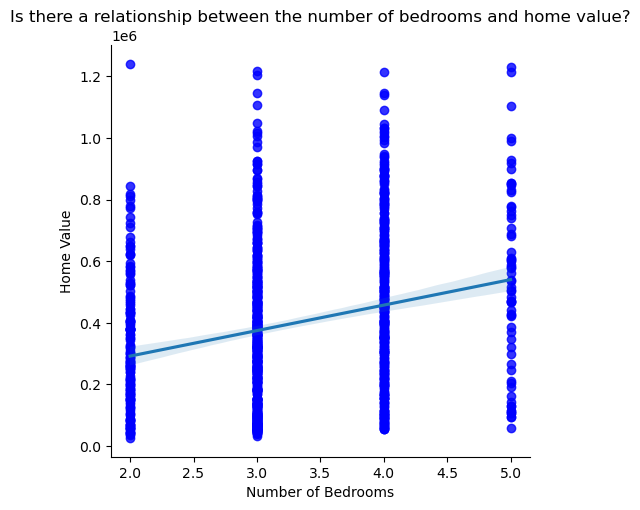

In [ ]:
e.get_bedroom_graph(train)


<span style="color:blue;">**Bedrooms and Home Value Relationship:**</span> 

<span style="color:blue;">* There is a statistically significant relationship between the number of bedrooms and home value.</span>

<span style="color:blue;">* Data is somewhat normally distributed</span>

<span style="color:blue;">* We can use the Pearson R correlation test to test for a correlation between the two variables.</span>

<span style="color:blue;">* p-value for the correlation test is low</span>

<span style="color:blue;">**We reject the $H_{0}$ and conclude that there is a statistically significant relationship between the number of bedrooms and home value.**</span>





In [ ]:
r, p = pearsonr(train.bedroom, train.home_value)

print('r:', r)
print('p:', p)

r: 0.21541329395558473
p: 7.3318024315910485e-292


<span style="color:blue;">**Bathrooms and Home Value Relationship:** Is number of bathrooms related to home value?</span> 

<span style="color:blue;">**$H_{0}$**: There is no statistically significant relationship between the number of bathrooms and home value</span> 

<span style="color:blue;">**$H_{a}$**: There is a statistically significant relationship between the number of bathrooms and home value</span> 

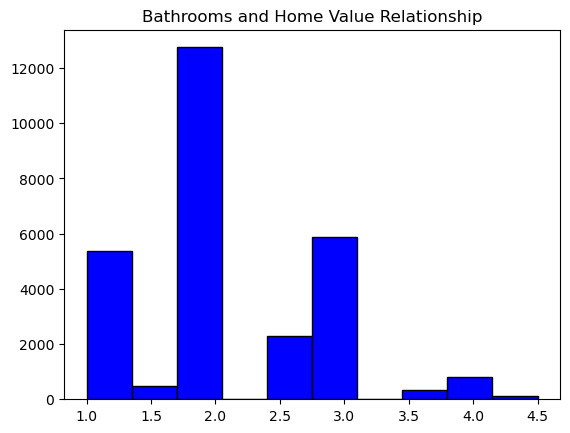

In [ ]:
plt.hist(train.bathroom, color = "blue", ec="black")
plt.title('Bathrooms and Home Value Relationship')
plt.show()


<span style="color:blue;">**Bathrooms and Home Value Relationship:**</span> 

<span style="color:blue;">* There is a statistically significant relationship between the number of bathrooms and home value
<span style="color:blue;">* Data is not normally distributed.</span>

<span style="color:blue;">* Use the Spearman R correlation test to test for a correlation between the two variables(even if the data is not normally distributed)</span>

<span style="color:blue;">* p-value for the correlation test is low</span>

<span style="color:blue;">**We reject the null hypothesis and conclude there is a statistically significant relationship between the number of bathrooms and home value.**</span>




In [ ]:
r, p = spearmanr(train.bathroom, train.home_value)

print('r:', r)
print('p:', p)

r: 0.39439535283600313
p: 0.0


<span style="color:blue;"> **Square Footage and Home Value Relationship:** Is square footage related to home value?</span>

 <span style="color:blue;"> **$H_{0}$**: There is no statistically significant relationship between  Square footage and home value.</span>

 <span style="color:blue;">**$H_{a}$**: There is a statistically significant relationship between  Square footage and home value.</span> 

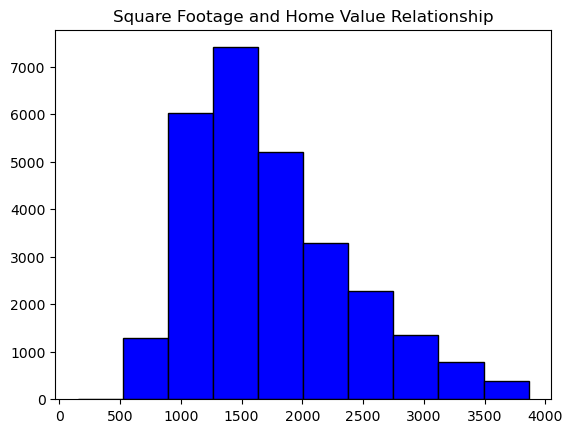

In [ ]:
plt.hist(train.sqft, color = "blue", ec="black")
plt.title('Square Footage and Home Value Relationship')
plt.show()

<span style="color:blue;"> **Square Footage and Home Value Relationship:** </span>

<span style="color:blue;"> * There is a statistically significant relationship between the square footage of a home and its value</span>

<span style="color:blue;"> * Data is not normally distributed. </span>

<span style="color:blue;"> * Use the Spearman R correlation test to test for a correlation between the two variables(even if the data is not normally distributed)</span>

<span style="color:blue;">* p-value for the correlation test is low</span> 


 <span style="color:blue;">**We reject the null hypothesis and conclude that there is a statistically significant relationship between the square footage of a home and its value.**</span> 


In [ ]:
r, p = spearmanr(train.sqft, train.home_value)

print('r:', r)
print('p:', p)

r: 0.43457017415122806
p: 0.0


# <span style="color: blue;"><left><u>EXPLORATION SUMMARY</u></left> 

<span style="color:blue;"> * **Variation Across Counties:** There is a difference in home value distribution among the three counties, with Los Angeles County having a higher proportion of lower value homes and Ventura County having fewer high value homes.</span>

<span style="color:blue;"> * **Importance of Square Footage:** Square footage demonstrates the strongest linear relationship with home value, indicating that larger homes tend to have higher values</span>

<span style="color:blue;">* **Correlation with Bedrooms and Bathrooms:** The number of bedrooms and bathrooms positively correlate with home value, suggesting that more bedrooms and bathrooms contribute to higher home values</span> 

# <span style="color: blue;"><left><u>MODELING</u></left> 


<span style="color:blue;">**I will use RMSE as an evaluation metric**</span>

<span style="color:blue;"> * **Evaluation Metric: The Root Mean Squared Error (RMSE)** will be utilized as the evaluation metric to assess the performance of the models. RMSE provides a comprehensive measure of the average difference between the predicted and actual home values, accounting for both the magnitude and direction of errors.</span>

<span style="color:blue;"> * **Baseline:** The baseline for comparison will be established using the mean of the 'value' feature. This simple baseline represents the average prediction and serves as a reference point to gauge the models' ability to capture the underlying patterns and improve upon the average prediction.</span>

<span style="color:blue;">* **Comparative Analysis:** By comparing the RMSE values of the models against the baseline, we can ascertain their effectiveness in accurately predicting home values. A lower RMSE value indicates better performance, demonstrating the models' ability to provide more precise estimations and capture the inherent variability in the data.</span> 

In [ ]:
# Dataset split into separate subsets to facilitate the modeling 
X_train, y_train, X_validate, y_validate, X_test, y_test = w.model_split(train, validate, test)

In [ ]:
# Change the target variable to databases 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)



In [ ]:
# Add the mean baseline to the db
home_value_pred_mean = y_train.home_value.mean()
y_train['home_value_pred_mean'] = home_value_pred_mean
y_validate['home_value_pred_mean'] = home_value_pred_mean

In [ ]:
# RMSE of baseline
rmse_train = mean_squared_error(y_train.home_value, y_train.home_value_pred_mean) ** (.5)

rmse_validate = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_mean) ** (.5)

In [ ]:
# View split
y_train.head()

,home_value,home_value_pred_mean
24502,514914.0,387915.732956
13135,284601.0,387915.732956
32655,70158.0,387915.732956
44891,182048.0,387915.732956
25404,372557.0,387915.732956


In [ ]:
# create a df to easily view results of models
metric_df = pd.DataFrame(data = [
        {
            'model': "mean_baseline",
            'RMSE_train': rmse_train,
            'RMSE_validate': rmse_validate,
            'R2_validate': explained_variance_score(y_validate.home_value, y_validate.home_value_pred_mean)
        }
])

In [ ]:
# check it out
metric_df.head()

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,263251.697141,262966.502653,0.0


In [ ]:
# run the models and compare the metrics to see the best performing one
y_train, y_validate, metric_df = e.ols_lasso_tweedie(X_train, X_validate, y_train, y_validate, metric_df)

RMSE for OLS using LinearRegression
        Training/In-Sample:  228687.77 
        Validation/Out-of-Sample: 230362.84

RMSE for LassoLars
        Training/In-Sample:  228687.77 
        Validation/Out-of-Sample: 230362.83

RMSE for TweedieRegressor
        Training/In-Sample:  263251.70 
        Validation/Out-of-Sample: 262966.50



In [ ]:
# see the R^2 of each model
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,263251.697141,262966.502653,0.000000
1,ols,228687.771612,230362.835481,0.232563
2,lasso_alpha0.03,228687.771612,230362.834453,0.232563
3,tweedie_power1_alpha1.0,263251.697141,262966.502653,0.000000


<span style="color:blue;">* **LassoLars** and **OLS** were the best performing models with an RMSE of approx 228,687.77 with and 
 of approx 23%.</span> 

<span style="color:blue;">* **Tweedie** model performance was only slightly better than the baseline, barely out performed **mean baseline**.</span>


<span style="color:blue;">* I will move forward with the LassoLars (alpha = 0.03) model.</span>

<span style="color:blue;">**LassoLars Model on Test Data**</span> 


In [ ]:
# County column dropped

X_test.head()

,bedroom,bathroom,sqft
3730,4.0,2.5,1886
30225,2.0,2.0,1314
39220,5.0,3.0,2486
49174,3.0,2.0,1582
45454,3.0,1.5,1183


In [ ]:
# make and fit the model
lars = LassoLars(alpha = 0.03)
LarsModel = lars.fit(X_train, y_train.home_value)

# predict with test data
y_test_pred = lars.predict(X_test)

# evaluate with RMSE
rmse_test = mean_squared_error(y_test, y_test_pred) ** .5

# calculate explained variance

r2_test = explained_variance_score(y_test, y_test_pred)

print(f"""RMSE for LassoLars:
_____________________________________________      
Test Performance: {rmse_test:.2f}
Test Explained Variance: {r2_test:.3f}
Baseline: {y_train.home_value.mean():.2f}""")

RMSE for LassoLars:
_____________________________________________      
Test Performance: 228018.05
Test Explained Variance: 0.250
Baseline: 387915.73


# <span style="color: blue;"><left><u> CONCLUSION</u></left> 
    

<span style="color: blue;">* The LassoLars model demonstrated superior performance compared to the baseline model when evaluated on unseen test data.</span>

<span style="color: blue;">* The current model's accuracy is limited to homes falling within the upper and lower quartiles of the dataset.</span>

# <span style="color: blue;"><left><u> SUSTIANED ANALYSIS</u></left> 


<span style="color:blue;">* Further analyze the data by splitting it into individual county subsets and building separate models for each.</span>

<span style="color:blue;">* Investigate the potential impact of scaling the data on the performance of the existing model.</span>

<span style="color:blue;">* Explore the correlation between bathroom and bedroom counts and consider creating a combined feature to enhance model performance.</span>

<span style="color:blue;">* Explore additional features within the dataset to uncover their relationship with home values.</span>

# <span style="color: blue;"><left><u> RECOMMENDATIONS</u></left> 

</span> <span style="color:blue;">* Continue refining and improving the predictive model to enhance the accuracy and reliability of home value predictions.</span> 

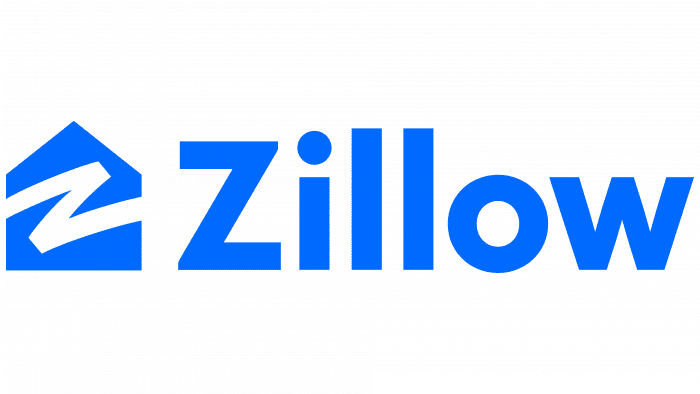